# Exercise: IMU-Based Stride Length Estimation

In [39]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from kielmat.datasets import keepcontrol

## Load the data

First, load the data from the left foot-worn IMU for subject "pp002" of the trial "walking at half your normal speed" from the Keep Control dataset.

In [40]:
DATASET_PATH = Path("../datasets/keepcontrol")
sub_id = "pp002"
task_name = "walkSlow"
track_sys = "imu"
tracked_points = ["left_foot", "right_foot"]

In [41]:
recording = keepcontrol.load_recording(
    dataset_path=DATASET_PATH, id=sub_id, task=task_name, tracking_systems=[track_sys], tracked_points=tracked_points
)

## Extract relevant metadata

In [42]:
sampling_freq_Hz = recording.channels[track_sys]["sampling_frequency"].iloc[0].astype(float)
mapping_units = {
    channel_type: recording.channels[track_sys][recording.channels[track_sys]["type"] == channel_type]["units"].iloc[0]
    for channel_type in recording.channels[track_sys]["type"].unique()
}
print(f"Sampling frequency: {sampling_freq_Hz} Hz")
print(f"Sensor units: {mapping_units}")

Sampling frequency: 200.0 Hz
Sensor units: {'ACCEL': 'g', 'GYRO': 'deg/s', 'MAGN': 'Gauss'}


In [43]:
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.1, horizontal_spacing=0.01)
for col_idx, tracked_point in enumerate(tracked_points):
    for row_idx, channel_type in enumerate(["ACCEL", "GYRO"]):
        for _, axis in enumerate(["x", "y", "z"]):
            fig.add_trace(
                go.Scatter(
                    x=np.arange(len(recording.data[track_sys])) / sampling_freq_Hz,
                    y=recording.data[track_sys][f"{tracked_point}_{channel_type}_{axis}"],
                    mode="lines",
                    name=f"{tracked_point}_{channel_type}_{axis}",
                ),
                row=row_idx + 1,
                col=col_idx + 1,
            )
        fig.update_yaxes(title_text=f"{mapping_units[channel_type]}", row=row_idx + 1, col=1)
fig.update_xaxes(title_text="time (s)", row=2, col=1)
fig.update_xaxes(title_text="time (s)", row=2, col=2)
fig.update_layout(margin=dict(l=30, r=30, t=20, b=20))
fig

Can you guess the sensor orientation based on these signals?
- What sensor axis corresponds to the vertical axis?
- What sensor axis corresponds to the mediolateral axis?

## Put the data in the expected format

See: https://gaitmap.readthedocs.io/en/latest/source/user_guide/prepare_data.html

In [44]:
recording.data[track_sys]

,left_foot_ACCEL_x,left_foot_ACCEL_y,left_foot_ACCEL_z,left_foot_GYRO_x,left_foot_GYRO_y,left_foot_GYRO_z,left_foot_MAGN_x,left_foot_MAGN_y,left_foot_MAGN_z,right_foot_ACCEL_x,right_foot_ACCEL_y,right_foot_ACCEL_z,right_foot_GYRO_x,right_foot_GYRO_y,right_foot_GYRO_z,right_foot_MAGN_x,right_foot_MAGN_y,right_foot_MAGN_z
0,-0.501003,-0.141622,0.856928,-0.088907,0.082052,0.259661,0.329105,1.127944,-0.824218,-0.500500,0.009290,0.866694,-0.436099,0.000000,-0.262789,-0.225090,1.048839,-1.058104
1,-0.503931,-0.136200,0.855481,-0.702367,0.175827,0.086554,0.331549,1.124271,-0.820310,-0.504431,0.004443,0.865247,0.170648,-0.346210,-0.262789,-0.223876,1.048839,-1.087883
2,-0.501912,-0.138177,0.849576,-0.346738,0.082052,0.173108,0.333994,1.120599,-0.816401,-0.505413,0.003938,0.867221,0.265452,0.000000,-0.091405,-0.222663,1.048839,-1.117662
3,-0.506355,-0.141112,0.857892,-0.266722,0.527480,-0.086554,0.333756,1.124271,-0.816401,-0.507815,0.002928,0.865247,-0.265452,0.519315,0.000000,-0.220202,1.051268,-1.104261
4,-0.495650,-0.135753,0.854999,0.266722,-0.257879,-0.259661,0.333484,1.127944,-0.816401,-0.502902,0.012218,0.872087,-0.521423,0.784743,0.525577,-0.217776,1.053697,-1.090826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-0.964842,-0.629900,0.626967,-49.139042,-42.573490,97.484344,0.706787,0.243425,-0.615225,-0.514694,0.035139,0.857881,-0.872198,-1.396380,-2.799271,0.650382,0.201182,-0.625496
2580,-0.887687,-0.331026,0.788108,-22.466864,-42.667263,68.278603,0.706040,0.240237,-0.617194,-0.521027,0.030797,0.860775,-1.839201,-0.346210,-2.536483,0.650382,0.199696,-0.624008
2581,-0.733377,-0.033683,0.929724,-10.926702,-39.080402,45.465488,0.701661,0.238297,-0.597887,-0.512183,0.031201,0.863801,-2.531271,-1.130953,-2.890676,0.650139,0.200204,-0.624256
2582,-0.664503,0.193359,0.945754,-13.638373,-30.863436,31.913633,0.697282,0.236322,-0.578610,-0.518079,0.035644,0.867221,-2.445948,-0.519315,-2.890676,0.649897,0.200675,-0.624504


In [45]:
fsf_dataset = {
    tracked_point: recording.data[track_sys][[c for c in recording.data[track_sys].columns if tracked_point in c and "MAGN" not in c]]
    for tracked_point in tracked_points
}
for tracked_point in fsf_dataset.keys():
    fsf_dataset[tracked_point].columns = [c.split("_")[-2][:3].lower() + "_" + c.split("_")[-1] for c in fsf_dataset[tracked_point].columns]
fsf_dataset

{'left_foot':          acc_x     acc_y     acc_z      gyr_x      gyr_y      gyr_z
 0    -0.501003 -0.141622  0.856928  -0.088907   0.082052   0.259661
 1    -0.503931 -0.136200  0.855481  -0.702367   0.175827   0.086554
 2    -0.501912 -0.138177  0.849576  -0.346738   0.082052   0.173108
 3    -0.506355 -0.141112  0.857892  -0.266722   0.527480  -0.086554
 4    -0.495650 -0.135753  0.854999   0.266722  -0.257879  -0.259661
 ...        ...       ...       ...        ...        ...        ...
 2579 -0.964842 -0.629900  0.626967 -49.139042 -42.573490  97.484344
 2580 -0.887687 -0.331026  0.788108 -22.466864 -42.667263  68.278603
 2581 -0.733377 -0.033683  0.929724 -10.926702 -39.080402  45.465488
 2582 -0.664503  0.193359  0.945754 -13.638373 -30.863436  31.913633
 2583 -0.522412  0.323243  0.950213 -16.172230 -26.584988  27.895063
 
 [2584 rows x 6 columns],
 'right_foot':          acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z
 0    -0.500500  0.009290  0.866694 -0.436099  0.00

In [55]:
# import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

if mapping_units["ACCEL"] == "g":
    for tracked_point in fsf_dataset.keys():
        fsf_dataset[tracked_point].loc[:, ["acc_x", "acc_y", "acc_z"]] *= 9.81
if mapping_units["GYRO"] == "rad/s":
    for tracked_point in fsf_dataset.keys():
        fsf_dataset[tracked_point].loc[:, ["gyr_x", "gyr_y", "gyr_z"]] *= 180 / np.pi

/tmp/ipykernel_61758/457413357.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_61758/457413357.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
from gaitmap.utils.coordinate_conversion import convert_to_fbf
from gaitmap.stride_segmentation import BarthDtw, BarthOriginalTemplate

In [48]:
fsf_dataset

{'left_foot':          acc_x     acc_y     acc_z      gyr_x      gyr_y      gyr_z
 0    -4.914837 -1.389314  8.406459  -0.088907   0.082052   0.259661
 1    -4.943567 -1.336120  8.392271  -0.702367   0.175827   0.086554
 2    -4.923753 -1.355520  8.334337  -0.346738   0.082052   0.173108
 3    -4.967344 -1.384308  8.415918  -0.266722   0.527480  -0.086554
 4    -4.862330 -1.331739  8.387542   0.266722  -0.257879  -0.259661
 ...        ...       ...       ...        ...        ...        ...
 2579 -9.465098 -6.179320  6.150549 -49.139042 -42.573490  97.484344
 2580 -8.708207 -3.247366  7.731342 -22.466864 -42.667263  68.278603
 2581 -7.194426 -0.330432  9.120595 -10.926702 -39.080402  45.465488
 2582 -6.518771  1.896852  9.277846 -13.638373 -30.863436  31.913633
 2583 -5.124864  3.171016  9.321593 -16.172230 -26.584988  27.895063
 
 [2584 rows x 6 columns],
 'right_foot':          acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z
 0    -4.909906  0.091130  8.502272 -0.436099  0.00

In [49]:
fbf_dataset = convert_to_fbf(fsf_dataset, left_like="left_", right_like="right_")
fbf_dataset

{'left_foot':         acc_pa    acc_ml    acc_si     gyr_pa     gyr_ml     gyr_si
 0    -4.914837 -1.389314 -8.406459   0.088907  -0.082052  -0.259661
 1    -4.943567 -1.336120 -8.392271   0.702367  -0.175827  -0.086554
 2    -4.923753 -1.355520 -8.334337   0.346738  -0.082052  -0.173108
 3    -4.967344 -1.384308 -8.415918   0.266722  -0.527480   0.086554
 4    -4.862330 -1.331739 -8.387542  -0.266722   0.257879   0.259661
 ...        ...       ...       ...        ...        ...        ...
 2579 -9.465098 -6.179320 -6.150549  49.139042  42.573490 -97.484344
 2580 -8.708207 -3.247366 -7.731342  22.466864  42.667263 -68.278603
 2581 -7.194426 -0.330432 -9.120595  10.926702  39.080402 -45.465488
 2582 -6.518771  1.896852 -9.277846  13.638373  30.863436 -31.913633
 2583 -5.124864  3.171016 -9.321593  16.172230  26.584988 -27.895063
 
 [2584 rows x 6 columns],
 'right_foot':         acc_pa    acc_ml    acc_si    gyr_pa    gyr_ml    gyr_si
 0    -4.909906 -0.091130 -8.502272 -0.436099 -0.00

In [50]:
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.1, horizontal_spacing=0.01)
for col_idx, tracked_point in enumerate(tracked_points):
    for row_idx, channel_type in enumerate(["acc", "gyr"]):
        for _, axis in enumerate(["pa", "ml", "si"]):
            fig.add_trace(
                go.Scatter(
                    x=np.arange(len(fbf_dataset[tracked_point])) / sampling_freq_Hz,
                    y=fbf_dataset[tracked_point][f"{channel_type}_{axis}"],
                    mode="lines",
                    name=f"{tracked_point}_{channel_type}_{axis}",
                ),
                row=row_idx + 1,
                col=col_idx + 1,
            )
        # fig.update_yaxes(title_text=f"{mapping_units[channel_type]}", row=row_idx + 1, col=1)
fig.update_xaxes(title_text="time (s)", row=2, col=1)
fig.update_xaxes(title_text="time (s)", row=2, col=2)
fig.update_layout(margin=dict(l=30, r=30, t=20, b=20))
fig

In [51]:
dtw = BarthDtw()
dtw = dtw.segment(data=fbf_dataset, sampling_rate_hz=sampling_freq_Hz)


In [56]:
dtw.stride_list_["left_foot"], dtw.stride_list_["right_foot"]

(      start   end
 s_id             
 0       803  1080
 1      1080  1384
 2      1384  1657
 3      1657  1958
 4      1958  2249
 5      2249  2370,
       start   end
 s_id             
 0       683   939
 1       939  1228
 2      1228  1515
 3      1515  1804
 4      1804  2101
 5      2101  2403)

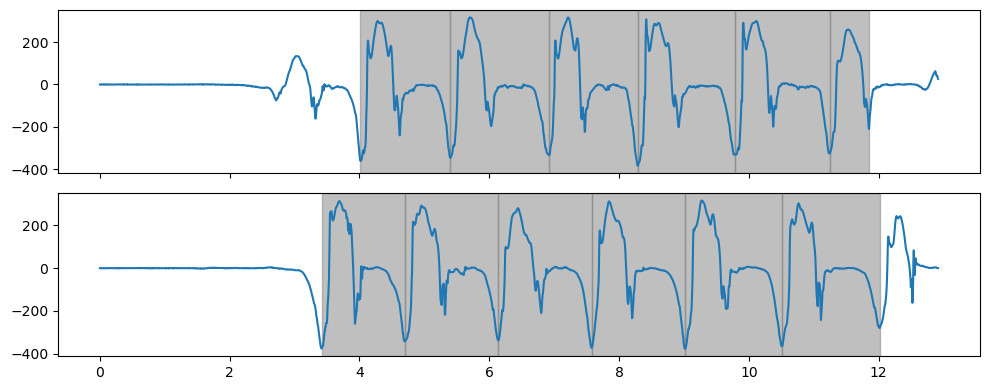

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
for row_idx, side in enumerate(["left", "right"]):
    for _, (start, end) in dtw.stride_list_[f"{side}_foot"][["start", "end"]].iterrows():
        axs[row_idx].axvspan(start/sampling_freq_Hz, end/sampling_freq_Hz, color="gray", alpha=0.5)
    axs[row_idx].plot(
        np.arange(len(fbf_dataset[f"{side}_foot"])) / sampling_freq_Hz, 
        fbf_dataset[f"{side}_foot"][["gyr_ml"]], 
        label="gyr_ml"
    )
plt.tight_layout()
plt.show()

In [60]:
from gaitmap.event_detection import RamppEventDetection

ed = RamppEventDetection()
ed = ed.detect(data=fbf_dataset, sampling_rate_hz=sampling_freq_Hz, stride_list=dtw.stride_list_)

In [61]:
from gaitmap.trajectory_reconstruction import (
    ForwardBackwardIntegration,
    MadgwickAHRS,
    StrideLevelTrajectory
)

In [63]:
ori_method = MadgwickAHRS()
pos_method = ForwardBackwardIntegration()
trajectory = StrideLevelTrajectory(ori_method=ori_method, pos_method=pos_method)

In [66]:
trajectory = trajectory.estimate(
    data=fsf_dataset, stride_event_list=ed.min_vel_event_list_, sampling_rate_hz=sampling_freq_Hz
)

In [67]:
from gaitmap.parameters import TemporalParameterCalculation, SpatialParameterCalculation

In [68]:
temp_params = TemporalParameterCalculation()
temp_params = temp_params.calculate(stride_event_list=ed.min_vel_event_list_, sampling_rate_hz=sampling_freq_Hz)
temp_params.parameters_["left_foot"]

,stride_time,swing_time,stance_time
s_id,,,
0,1.400,0.470,0.930
1,1.465,0.440,1.025
2,1.445,0.490,0.955
3,1.470,0.465,1.005


In [72]:
spatial_params = SpatialParameterCalculation()
spatial_params = spatial_params.calculate(
    stride_event_list=ed.min_vel_event_list_,
    positions=trajectory.position_,
    orientations=trajectory.orientation_,
    sampling_rate_hz=sampling_freq_Hz
)
spatial_params.parameters_["left_foot"]

,arc_length,gait_velocity,ic_angle,max_lateral_excursion,max_sensor_lift,stride_length,tc_angle,turning_angle
s_id,,,,,,,,
0,297.918254,72.292605,-8.857714,3.103192,123.080683,101.209647,-84.363631,0.471716
1,278.300237,75.279034,-10.200285,5.493955,114.128073,110.283785,-84.125525,-2.658650
2,473.314921,70.324420,-10.635335,5.586025,211.047894,101.618788,-84.869341,-0.558656
3,211.822798,68.486868,-13.426500,2.135088,79.888742,100.675695,-80.950529,3.362747
